# CreditRisk data

In [1]:
# loading the necessary libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cr = pd.read_csv(r"F:\carreer\CreditRisk.csv")

# reading a file
# location, file name , type of the file

In [3]:
cr.shape # num rows and num of columns

(981, 13)

In [4]:
cr.head() # reviewing the data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Problem statement
# bank want to build predictive model 
#which it can use for approval / rejection of loan.

# data cleaning

In [7]:

cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
cr.Gender = cr.Gender.fillna("Male")
cr.LoanAmount = cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Married = cr.Married.fillna("Yes")
cr.Dependents = cr.Dependents.fillna(cr.Dependents.median())
cr.Self_Employed = cr.Self_Employed.fillna("No")
cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.median())
cr.Credit_History = cr.Credit_History.fillna(0.0)


In [9]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


In [10]:
cr.Loan_Status.replace({'Y':1, "N":0}, inplace=True)


In [11]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,1


In [12]:
cr = cr.drop(['Loan_ID'], axis = 1)

In [13]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,1
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,1
4,Male,No,0.0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,1


# Non numeric to numeric

In [14]:
# loading lib for cornverting non-numeric to numeric using Label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
# doing it manually for each and every variable one by one
# but can be using one line code also

cr.Education = le.fit_transform(cr.Education)
cr.Self_Employed = le.fit_transform(cr.Self_Employed)
cr.Property_Area = le.fit_transform(cr.Property_Area)
cr.Married = le.fit_transform(cr.Married)
cr.Gender = le.fit_transform(cr.Gender)

In [16]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [17]:
cr.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
Data 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_cr , test_cr = train_test_split(cr,test_size = .2)

In [20]:
train_cr_x = train_cr.iloc[: , 0:-1]
train_cr_y = train_cr.iloc[: , -1]

In [21]:
test_cr_x = test_cr.iloc[: , 0:-1]
test_cr_y = test_cr.iloc[: , -1]

In [22]:
# how did we build linear regression
# we imported some fucnntion from sklearn
# we created the object of it
# fit function (build model) (x,y)
# then we did prediction

# Building the model

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_cr = LogisticRegression()

In [25]:
log_cr.fit(train_cr_x , train_cr_y); # model has been build

C:\Users\Shyam Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
pred = log_cr.predict(test_cr_x) # predicting on test data

In [27]:
pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [28]:
len(pred) # record in test data

197

In [29]:
pd.crosstab(test_cr_y , pred)  # another way to see confussion matrix

col_0,0,1
Loan_Status,,
0,29,29
1,9,130


In [30]:
from sklearn.metrics import confusion_matrix # using sklearn

In [31]:
tab_cr = confusion_matrix(test_cr_y , pred)
tab_cr # from top it is predicted

array([[ 29,  29],
       [  9, 130]], dtype=int64)

In [32]:
tab_cr = confusion_matrix( pred , test_cr_y )
tab_cr # predicted from left to right

array([[ 29,   9],
       [ 29, 130]], dtype=int64)

In [33]:
( 34 + 123 ) / ( 34 + 25 + 15 + 123  ) # 1st method to solve the accuracy

0.7969543147208121

In [34]:
tab_cr.diagonal().sum()

159

In [35]:
tab_cr.sum()

197

In [36]:
tab_cr.diagonal().sum() / tab_cr.sum() # 2nd method to foidn the accuracy

0.8071065989847716

In [37]:
tab_cr.diagonal().sum() * 100 / tab_cr.sum() # to find in the percentage

80.71065989847716

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(test_cr_y , pred) * 100 # 3rd method best method

80.71065989847716

# precision formula
Tp /( Tp + Fp )
123 / (123 + 25)


In [40]:
from sklearn.metrics import precision_score

In [41]:
precision_score(test_cr_y , pred) # to find the precision

0.8176100628930818

# Recall nothing but Tpr
Tp / Tp + Fn

In [42]:
(123)/(123+15)

0.8913043478260869

In [43]:
from sklearn.metrics import recall_score

In [44]:
recall_score(test_cr_y , pred)

0.935251798561151

# F1 Score
(2 * prec * recall) /(recall+precision)

In [45]:
from sklearn.metrics import f1_score

In [46]:
f1_score(test_cr_y, pred)

0.8724832214765101

# AUROC and build the plot for auroc

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [48]:
pred = log_cr.predict(test_cr_x) #pred

In [49]:
pred_prob = log_cr.predict_proba(test_cr_x) # proba mean to predict probsblity

In [50]:
pred_prob

array([[0.07286665, 0.92713335],
       [0.53057119, 0.46942881],
       [0.08219986, 0.91780014],
       [0.23766146, 0.76233854],
       [0.20013794, 0.79986206],
       [0.15405473, 0.84594527],
       [0.21307972, 0.78692028],
       [0.0798266 , 0.9201734 ],
       [0.66201578, 0.33798422],
       [0.14805741, 0.85194259],
       [0.13216521, 0.86783479],
       [0.09469209, 0.90530791],
       [0.07170989, 0.92829011],
       [0.11865968, 0.88134032],
       [0.19697535, 0.80302465],
       [0.29108657, 0.70891343],
       [0.22139708, 0.77860292],
       [0.14210121, 0.85789879],
       [0.08784129, 0.91215871],
       [0.08924119, 0.91075881],
       [0.09677751, 0.90322249],
       [0.11287961, 0.88712039],
       [0.25376263, 0.74623737],
       [0.18452194, 0.81547806],
       [0.16525099, 0.83474901],
       [0.20850594, 0.79149406],
       [0.20278463, 0.79721537],
       [0.61495714, 0.38504286],
       [0.15416856, 0.84583144],
       [0.13151391, 0.86848609],
       [0.

In [51]:
pred_prob.shape # it means this is giviing the probablity in class 0 and 1 for each record
 # based on probablity the classes where decided

(197, 2)

In [52]:
roc_auc_score(test_cr_y , pred) # this is the area under the curve

0.7176258992805755

In [53]:
# many time here job is done but somtime you need to write some more line that is to plot the graph area under the curve 

In [54]:
pred_prob = log_cr.predict_proba(test_cr_x)
pred_prob

array([[0.07286665, 0.92713335],
       [0.53057119, 0.46942881],
       [0.08219986, 0.91780014],
       [0.23766146, 0.76233854],
       [0.20013794, 0.79986206],
       [0.15405473, 0.84594527],
       [0.21307972, 0.78692028],
       [0.0798266 , 0.9201734 ],
       [0.66201578, 0.33798422],
       [0.14805741, 0.85194259],
       [0.13216521, 0.86783479],
       [0.09469209, 0.90530791],
       [0.07170989, 0.92829011],
       [0.11865968, 0.88134032],
       [0.19697535, 0.80302465],
       [0.29108657, 0.70891343],
       [0.22139708, 0.77860292],
       [0.14210121, 0.85789879],
       [0.08784129, 0.91215871],
       [0.08924119, 0.91075881],
       [0.09677751, 0.90322249],
       [0.11287961, 0.88712039],
       [0.25376263, 0.74623737],
       [0.18452194, 0.81547806],
       [0.16525099, 0.83474901],
       [0.20850594, 0.79149406],
       [0.20278463, 0.79721537],
       [0.61495714, 0.38504286],
       [0.15416856, 0.84583144],
       [0.13151391, 0.86848609],
       [0.

In [55]:
# here convention as standard is that right column indicate 'p' and left comlumn indicate 'q'

# select only second columns

In [56]:
pred_prob[: , 1] # this selects your probablity for class 1
                # basically selecting the second columns
    # just for knowledgee purpose

array([0.92713335, 0.46942881, 0.91780014, 0.76233854, 0.79986206,
       0.84594527, 0.78692028, 0.9201734 , 0.33798422, 0.85194259,
       0.86783479, 0.90530791, 0.92829011, 0.88134032, 0.80302465,
       0.70891343, 0.77860292, 0.85789879, 0.91215871, 0.91075881,
       0.90322249, 0.88712039, 0.74623737, 0.81547806, 0.83474901,
       0.79149406, 0.79721537, 0.38504286, 0.84583144, 0.86848609,
       0.4907856 , 0.37546228, 0.79001454, 0.86386413, 0.91839184,
       0.83051294, 0.21895878, 0.24193305, 0.87198154, 0.86880542,
       0.9576693 , 0.72487224, 0.90228175, 0.87558132, 0.96590134,
       0.91357656, 0.8601571 , 0.22787945, 0.77072568, 0.31716151,
       0.97608303, 0.57423516, 0.30553315, 0.83546741, 0.85611296,
       0.74304822, 0.6948771 , 0.38192939, 0.74976312, 0.32092108,
       0.68591077, 0.90002569, 0.85070767, 0.68457677, 0.88731143,
       0.91871765, 0.80687846, 0.8437715 , 0.44858539, 0.75799513,
       0.93623319, 0.92619424, 0.32322301, 0.78147577, 0.88549

# Plotting ROC Curve

In [57]:
fpr , tpr , thres = roc_curve(test_cr_y , pred_prob[: , 1])  # this will return 3 things fpr tpr thres

In [58]:
# for Visualizing the ROC

import matplotlib.pyplot as plt

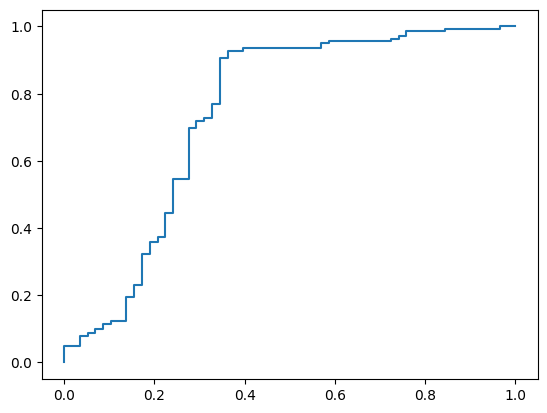

In [59]:
plt.plot(fpr , tpr) # graph of curve

Text(0.5, 0.5, 'Auroc is 0.7337877671333825 ')

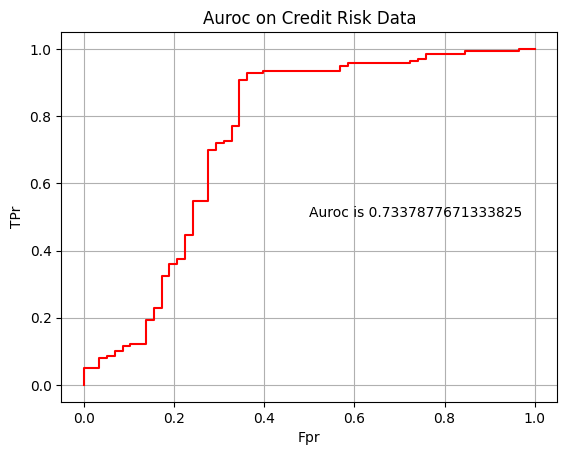

In [60]:
# making the Plot bit attrative for analyzing purpose

plt.plot(fpr , tpr , color = 'r')
plt.xlabel("Fpr") # show on x axis
plt.ylabel("TPr") # show on y axis
plt.title("Auroc on Credit Risk Data") # to add title
plt.grid() # to show grid
plt.text(x = .5 , y = .5 , s="Auroc is 0.7337877671333825 ") # to plot text

# Conclusion

In [ ]:
# Here we have analyzed the data and pre-processed the data, Trained and build the model using the Logistic regression
# to know loan default and their proality we used Logistic regression
# we used precision, Recall, F1, and AUROC to evalvate the performance of the models at predicting class labels.
# we can round up our demo of how ML can be applied to the world in credit risk management.